**ÉTAPE 0** : préparation des données

In [1]:
import pandas as pd 
import process
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

In [10]:
import warnings 


warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

lookback_window_0 = [0, 50]
number_of_clusters = 38
sigma = 10e-2
clustering_method = 'SPONGE' 
number_of_repetition = 20
number_of_window=50
evaluation_window = 5
eta_values = np.linspace(0.001, 0.02, 20)
np.set_printoptions(precision=4, suppress=True)

overall_return, PnL, portfolio_value, sharpe_ratio, daily_PnL = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, number_of_window=number_of_window, evaluation_window=evaluation_window, eta=eta_values[4])

1.0258188132555508
step 1
1.031695600514319
step 2
1.034451680959797
step 3
1.0373380611649228
step 4
1.0293264122646344
step 5
1.0374085557485042
step 6
1.0455653001658285
step 7
1.0394149642175434
step 8
1.0439137372468652
step 9
1.0415048948102452
step 10
1.0508447390997848
step 11
1.0532597280108826
step 12
1.0634600488361772
step 13
1.056520149584588
step 14
1.0621659958400225
step 15
1.0695792096812156
step 16
1.0740498628884836
step 17
1.0682645818715304
step 18
1.0631329635070308
step 19
1.0751433315791048
step 20
1.0856146074681081
step 21
1.0868314367567102
step 22
1.0841722082944139
step 23
1.0870747982454674
step 24
1.0998155080420837
step 25
1.0872201828794419
step 26
1.0873482461068575
step 27
1.0916092563292554
step 28
1.0847119058241896
step 29
1.0773568868704928
step 30
1.079797788349411
step 31
1.095336832957826
step 32
1.1078250302157462
step 33
1.1092284498488096
step 34
1.1163360703537604
step 35
1.119376656578121
step 36
1.1263399332442185
step 37
1.13191643006331

In [17]:
PnL[-1], eta_values[4]

(0.21866193456883232, 0.005)

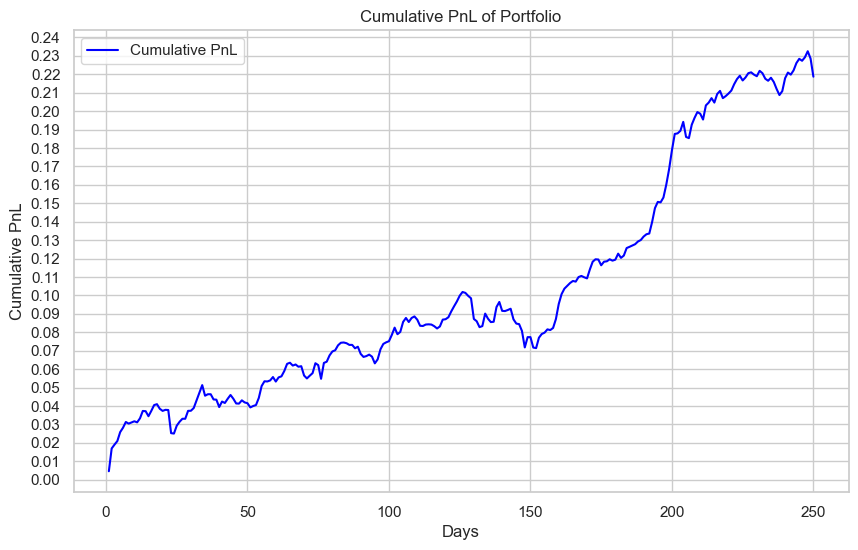

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=days, y=PnL, label='Cumulative PnL', color='blue')

# Ajouter des titres et des légendes
plt.title('Cumulative PnL of Portfolio')
plt.xlabel('Days')
plt.ylabel('Cumulative PnL')

# Personnaliser l'axe des ordonnées avec un pas de 0.01
plt.yticks(np.arange(0, max(PnL) + 0.01, 0.01))

# Afficher le graphique
plt.show()

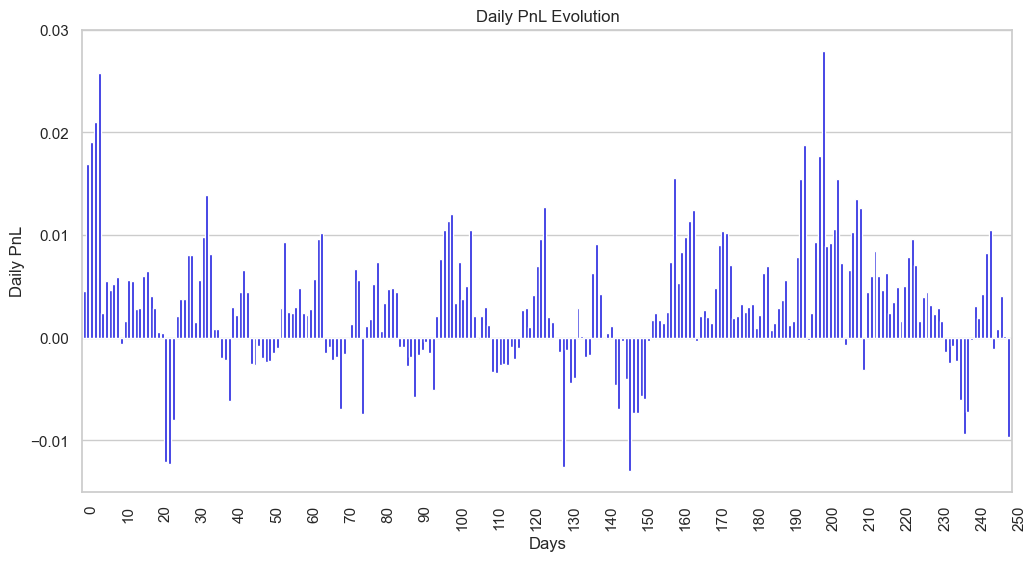

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(daily_PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer l'évolution quotidienne de la PnL sous forme de diagramme à barres avec seaborn
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=days, y=daily_PnL, color='blue', width=0.8)  # Ajustez la largeur ici

# Rotation des étiquettes de l'axe des abscisses de 45 degrés avec un ajustement
ax.set_xticks(np.arange(0,251,10))
ax.set_xticklabels(ax.get_xticks(), rotation=90, ha='right', rotation_mode='anchor')

# Ajouter des titres et des légendes
plt.title('Daily PnL Evolution')
plt.xlabel('Days')
plt.ylabel('Daily PnL')

# Afficher le graphique
plt.show()
